## Preprocessing the Temperature and Precipitation Data Set

### Temperature and precipitation climate impact indicators from 1970 to 2100 derived from European climate projections

#### Link - https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-hydrology-meteorology-derived-projections?tab=overview

In [2]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import os
import shutil

In [3]:
files_rcp45=[]
files_rcp85=[]
for file in os.listdir(os.path.join(os.getcwd(), 'rcp_45')):
    files_rcp45.append(file)
                       
for file in os.listdir(os.path.join(os.getcwd(), 'rcp_85')):
    files_rcp85.append(file)
        
print(f'Total files with RCP45: {len(files_rcp45)}')
print(f'Total files with RCP85: {len(files_rcp85)}')

Total files with RCP45: 33
Total files with RCP85: 33


There are a total of 66 files. There are 33 files for each RCP Scenario, each file for a year's data from 2018 to 2050.

In [4]:
for file in os.listdir(os.path.join(os.getcwd(), 'rcp_45')):
    print(str(file.split('.')[:-1][0]))

tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2018_grid5km_v1
tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2019_grid5km_v1
tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2020_grid5km_v1
tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2021_grid5km_v1
tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2022_grid5km_v1
tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2023_grid5km_v1
tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2024_grid5km_v1
tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2025_grid5km_v1
tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2026_grid5km_v1
tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2027_g

In [5]:
files_rcp45[0]

'tasAdjust_day_QM-EFAS-Meteo_EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2018_grid5km_v1.nc'

## Opening and Inspecting Files with RECP Scenario 4.5

In [6]:
ds=xr.open_mfdataset(os.path.join(os.getcwd(), 'rcp_45', files_rcp45[0]))
ds

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 365, y: 950, x: 1000)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2018-01-01T12:00:00 ... 2018-12-31T1...
    lon        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    lat        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    height     float64 8B ...
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 1GB dask.array<chunksize=(1, 950, 1000), meta=np.ndarray>
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-14T00:20:23ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp45
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

In [7]:
ds.isel(time=1)

<xarray.Dataset> Size: 11MB
Dimensions:    (y: 950, x: 1000)
Coordinates:
    time       datetime64[ns] 8B 2018-01-02T12:00:00
    lon        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    lat        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    height     float64 8B ...
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-14T00:20:23ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp45
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

In [8]:
df1=ds.isel(time=1).to_dataframe()

In [9]:
df1

time        lon        lat   tasAdjust  height
y   x                                                                
0   0   2018-01-02 12:00:00  -8.229275  27.802845  286.984741     2.0
    1   2018-01-02 12:00:00  -8.180322  27.813362  287.051178     2.0
    2   2018-01-02 12:00:00  -8.131361  27.823853  287.050507     2.0
    3   2018-01-02 12:00:00  -8.082390  27.834314  287.157379     2.0
    4   2018-01-02 12:00:00  -8.033411  27.844748  287.257507     2.0
...                     ...        ...        ...         ...     ...
949 995 2018-01-02 12:00:00  73.721550  58.389679         NaN     2.0
    996 2018-01-02 12:00:00  73.775719  58.353977         NaN     2.0
    997 2018-01-02 12:00:00  73.829788  58.318253         NaN     2.0
    998 2018-01-02 12:00:00  73.883781  58.282505         NaN     2.0
    999 2018-01-02 12:00:00  73.937675  58.246738         NaN     2.0

[950000 rows x 5 columns]

For only 1 time stamp there are 950000 datapoints. 

Since there are 365 time stamps, it means that there are observations for each day of the year.

## Description

We have only one variable i.e tasAdjust  (time, y, x) that mean temerature of the air at 2 m height
It is an Essential Climate Variable - The ambient air temperature close to the surface.

The essential climate variable (ECV) data originate from EURO-CORDEX RCM simulations and are bias adjusted using the EFAS-Meteo reference dataset. Link to access the data is - https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-hydrology-meteorology-derived-projections?tab=overview

Resolution of Data - 
   1. Daily Data From 2018 to 2050.
   2. 5km x 5 km
   3. Horizontal Coverage - Europe (EFAS-Meteo domain).
   4. Both RCP 4.5 and RCP 8.5 data have been downloaded.

### Visualizing the Variable from one file

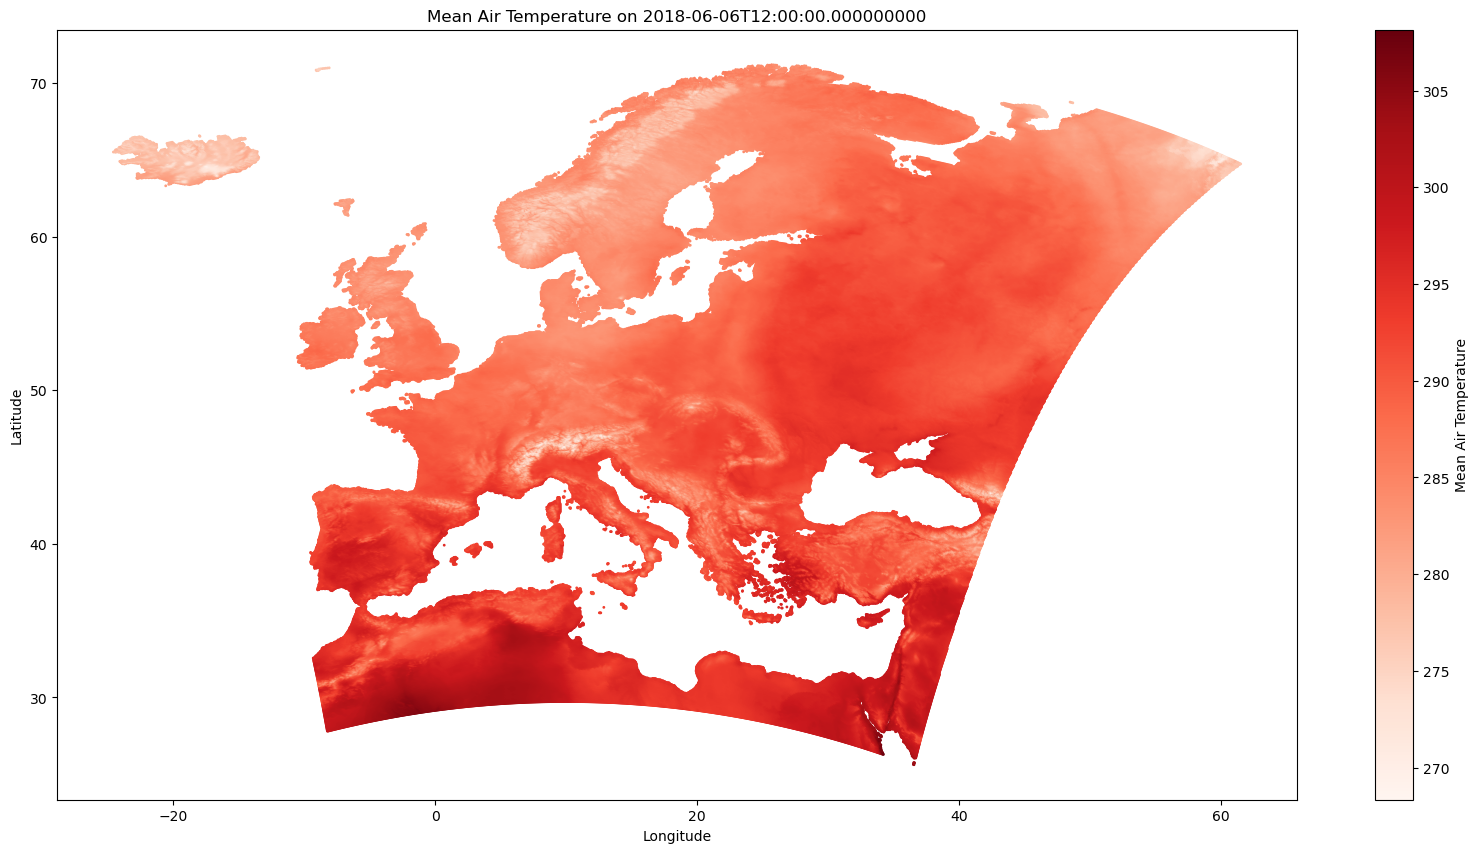

In [10]:
plt.figure(figsize=(20, 10))
plt.scatter(ds['lon'], ds['lat'], c=ds['tasAdjust'][156,:,:], cmap='Reds', s=1)
plt.colorbar(label='Mean Air Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Mean Air Temperature on {ds['time'][156].values}')
plt.show()

### Sampling Daily data to Monthly Level

In [11]:
ds_monthly = ds.resample(time='1ME').mean()

In [12]:
ds_monthly

<xarray.Dataset> Size: 53MB
Dimensions:    (y: 950, x: 1000, time: 12)
Coordinates:
    lon        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    lat        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    height     float64 8B ...
  * time       (time) datetime64[ns] 96B 2018-01-31 2018-02-28 ... 2018-12-31
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 46MB dask.array<chunksize=(1, 950, 1000), meta=np.ndarray>
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-14T00:20:23ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp45
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

### Visualizing variable at Monthly Level

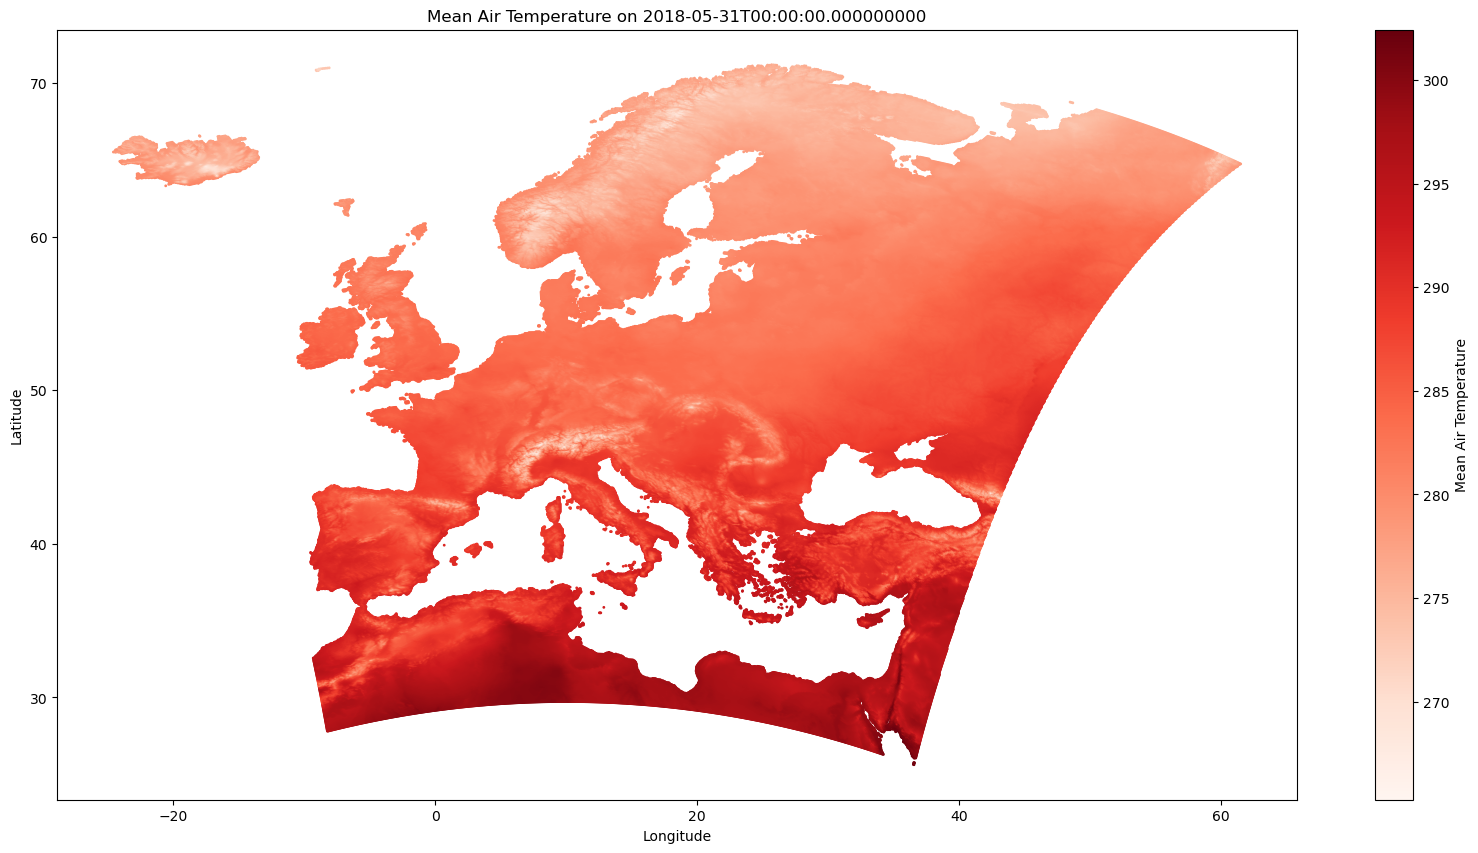

In [13]:
plt.figure(figsize=(20, 10))
plt.scatter(ds_monthly['lon'], ds_monthly['lat'], c=ds_monthly['tasAdjust'][4,:,:], cmap='Reds', s=1)
plt.colorbar(label='Mean Air Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Mean Air Temperature on {ds_monthly['time'][4].values}')
plt.show()

### Plotting Time Series for data captured in 2018

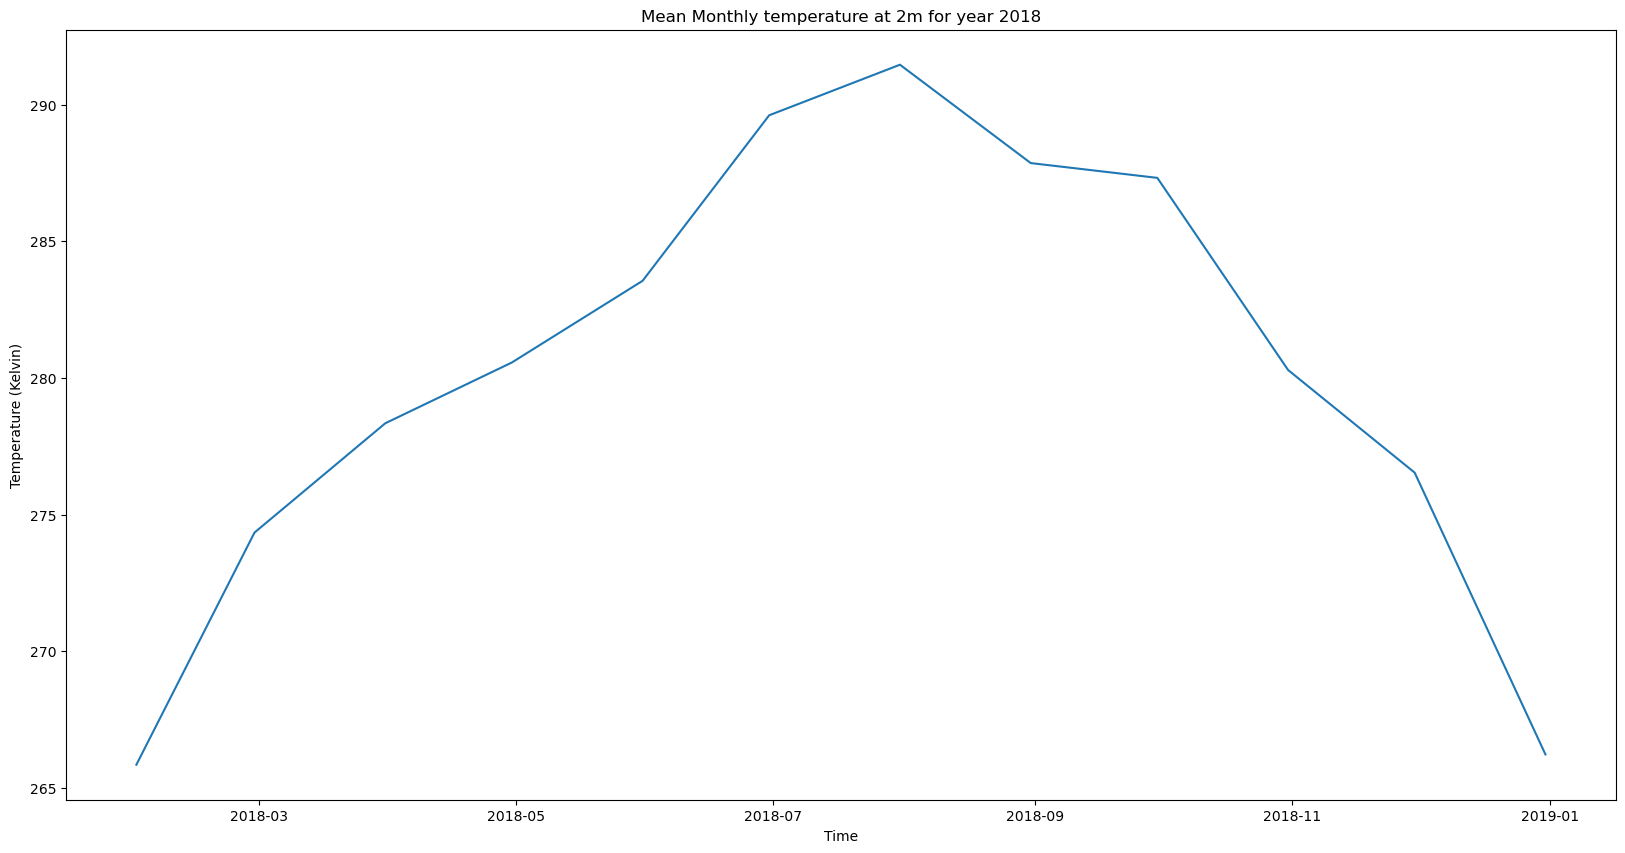

In [14]:
plt.figure(figsize=(20, 10))
tasAdjust_monthly = ds_monthly['tasAdjust'][:,500, 600]
time=ds_monthly['time']
plt.plot(time, tasAdjust_monthly )
plt.xlabel('Time')
plt.ylabel('Temperature (Kelvin)')
plt.title("Mean Monthly temperature at 2m for year 2018")
plt.show()

In [15]:
ds_monthly.isel(time=1).to_dataframe()

lon        lat   tasAdjust  height       time
y   x                                                       
0   0    -8.229275  27.802845  288.186493     2.0 2018-02-28
    1    -8.180322  27.813362  288.204071     2.0 2018-02-28
    2    -8.131361  27.823853  288.229431     2.0 2018-02-28
    3    -8.082390  27.834314  288.285828     2.0 2018-02-28
    4    -8.033411  27.844748  288.337555     2.0 2018-02-28
...            ...        ...         ...     ...        ...
949 995  73.721550  58.389679         NaN     2.0 2018-02-28
    996  73.775719  58.353977         NaN     2.0 2018-02-28
    997  73.829788  58.318253         NaN     2.0 2018-02-28
    998  73.883781  58.282505         NaN     2.0 2018-02-28
    999  73.937675  58.246738         NaN     2.0 2018-02-28

[950000 rows x 5 columns]

In [16]:
ds.close()
ds_monthly.close()

## Combining and saving all files with RCP4.5 Data

In [17]:
ds_rcp_45=xr.open_mfdataset(os.path.join(os.path.join(os.getcwd(), 'rcp_45', '*.nc')), parallel=True)

In [18]:
ds_rcp_45

<xarray.Dataset> Size: 46GB
Dimensions:    (time: 12053, y: 950, x: 1000)
Coordinates:
  * time       (time) datetime64[ns] 96kB 2018-01-01T12:00:00 ... 2050-12-31T...
    lon        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    lat        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    height     float64 8B 2.0
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 46GB dask.array<chunksize=(1, 950, 1000), meta=np.ndarray>
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-14T00:20:23ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp45
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

### Observations

After merging the files the time stamps have increased to huge number and there are 950000 data pints for each time stamp.

If needed we can go ahead with monthly as well as yearly observations after resampling them at monthly and yearly level and calculating their means.

### Resampling all data for RCP 4.5 to yearly level

In [19]:
ds_rcp_45_yearly = ds_rcp_45.resample(time='1YE').mean()

In [20]:
ds_rcp_45_yearly

<xarray.Dataset> Size: 133MB
Dimensions:    (y: 950, x: 1000, time: 33)
Coordinates:
    lon        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    lat        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    height     float64 8B 2.0
  * time       (time) datetime64[ns] 264B 2018-12-31 2019-12-31 ... 2050-12-31
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 125MB dask.array<chunksize=(1, 950, 1000), meta=np.ndarray>
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-14T00:20:23ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp45
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

In [21]:
ds_rcp_45_yearly.isel(time=1)

<xarray.Dataset> Size: 11MB
Dimensions:    (y: 950, x: 1000)
Coordinates:
    lon        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    lat        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    height     float64 8B 2.0
    time       datetime64[ns] 8B 2019-12-31
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-14T00:20:23ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp45
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

In [22]:
# tasAdjust_yearly = ds_rcp_45_yearly['tasAdjust'][:,500, 600]
# time=ds_rcp_45_yearly['time']

In [23]:
# tasAdjust_yearly

In [24]:
# vals=tasAdjust_yearly.values >>> system froze

In [25]:
# tasAdjust_yearly.values >>> Takes a long time to run

In [26]:
# plt.figure()
# plt.bar(vals, time)
# plt.title("Mean yearly change in temperature")
# plt.xlabel('Time')
# plt.ylabel('Temperature (Kelvin)')
# plt.show()

In [27]:
# saving the yearly data
# ds_rcp_45_yearly.to_netcdf(os.path.join(os.getcwd(), 'temperature_rcp_45_yearly.nc'))
# ds_rcp_45_yearly.close()

In [28]:
# ds_rcp_45_monthly=ds_rcp_45.resample(time='1ME').mean()
# already completed

In [29]:
# ds_rcp_45_monthly.to_netcdf(os.path.join(os.getcwd(), 'temperature_rcp_45_monthly.nc'))
# already completed

In [30]:
# # reading the monthly data
# ds_45_monthly=xr.open_dataset('temperature_rcp_45_monthly.nc') # taking too much time.

## Combining and Saving all files with RCP 8.5 Data

In [31]:
ds_rcp_85=xr.open_mfdataset((os.path.join(os.getcwd(), 'rcp_85', '*.nc')), parallel=True)

In [32]:
ds_rcp_85

<xarray.Dataset> Size: 46GB
Dimensions:    (time: 12053, y: 950, x: 1000)
Coordinates:
  * time       (time) datetime64[ns] 96kB 2018-01-01T12:00:00 ... 2050-12-31T...
    lon        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    lat        (y, x) float32 4MB dask.array<chunksize=(950, 1000), meta=np.ndarray>
    height     float64 8B 2.0
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 46GB dask.array<chunksize=(1, 950, 1000), meta=np.ndarray>
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-13T23:47:09ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp85
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

In [36]:
ds_rcp_85_monthly=ds_rcp_85.resample(time='1ME').mean()

In [8]:
# ds_rcp_85_monthly.to_netcdf(os.path.join(os.getcwd(), 'temperature_rcp_85_monthly.nc'))

In [33]:
# reading the monthly data
# ds_85_monthly=xr.open_dataset('temperature_rcp_85_monthly.nc')

### Visualizing Yearly Tempertaure Change

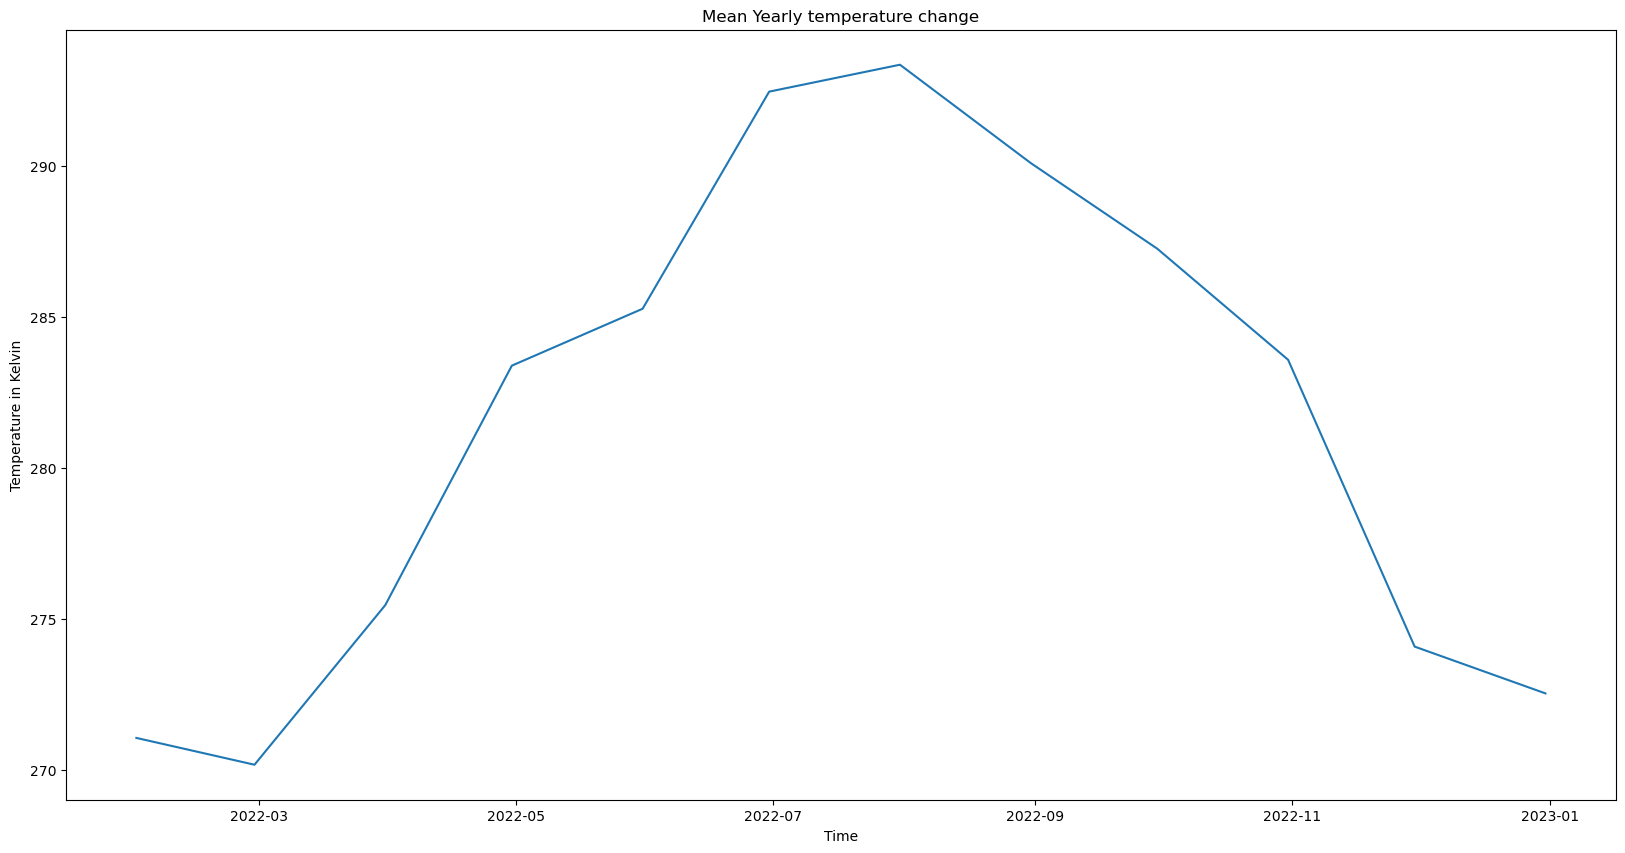

In [37]:
plt.figure(figsize=(20, 10))
plt.plot(ds_rcp_85_monthly['time'][48:60], ds_rcp_85_monthly['tasAdjust'][48:60, 500, 600,] )
plt.xlabel('Time')
plt.ylabel('Temperature in Kelvin')
plt.title("Mean Yearly temperature change")
plt.show()

Caveat :
>> Saving the Monthly sampled and yearly sampled data takes too much time. 
>> Even Loading form the saved file takes a lot of time.

In [38]:
# ds_rcp_85_monthly.to_dataframe()

KeyboardInterrupt: 